<a href="https://colab.research.google.com/github/TheNamesShadow/RCP-Ocean-Acidification-Forecasting/blob/main/Simple%20pH%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


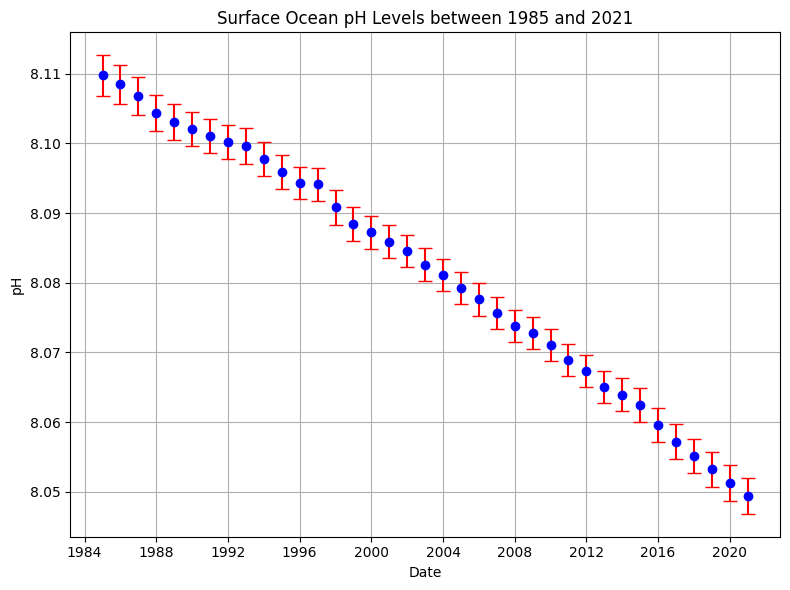

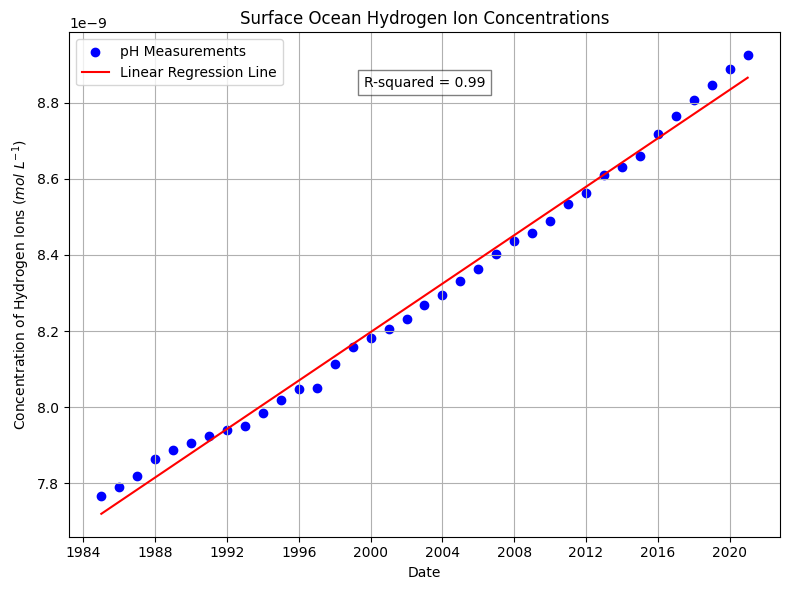

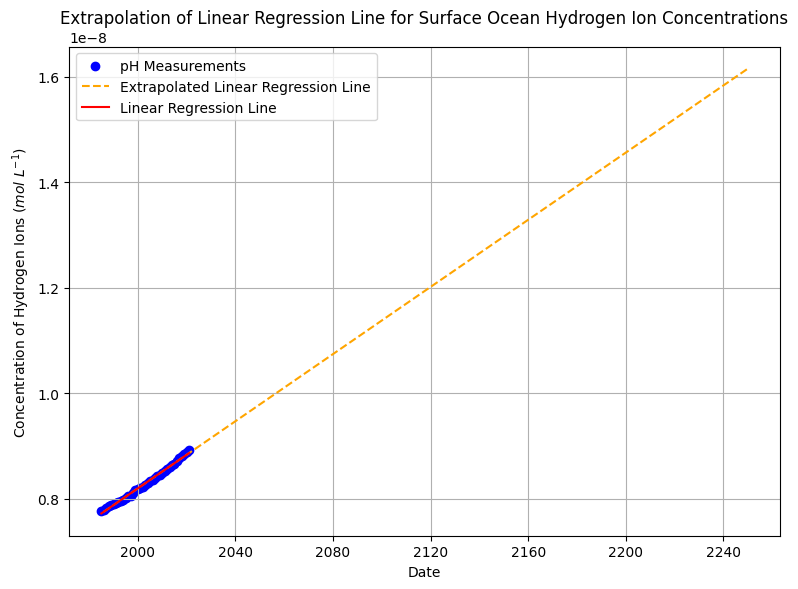

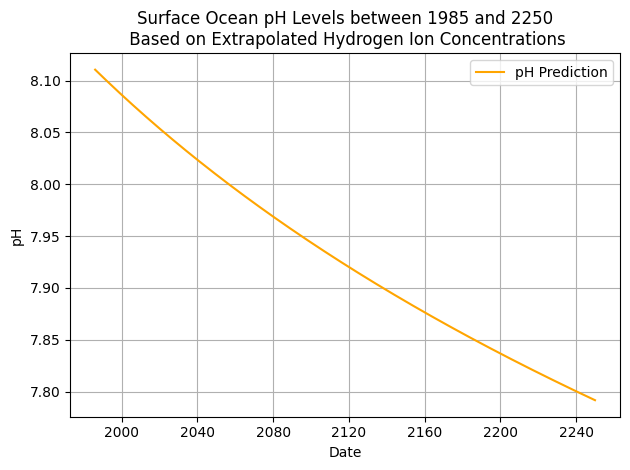

         dates        pH
0   1985-12-31  8.110614
1   1986-12-31  8.108836
2   1987-12-31  8.107065
3   1988-12-31  8.105296
4   1989-12-31  8.103539
5   1990-12-31  8.101790
6   1991-12-31  8.100047
7   1992-12-31  8.098307
8   1993-12-31  8.096578
9   1994-12-31  8.094856
10  1995-12-31  8.093141
11  1996-12-31  8.091428
12  1997-12-31  8.089727
13  1998-12-31  8.088032
14  1999-12-31  8.086343
15  2000-12-31  8.084657
16  2001-12-31  8.082982
17  2002-12-31  8.081313
18  2003-12-31  8.079650
19  2004-12-31  8.077990
20  2005-12-31  8.076340
21  2006-12-31  8.074696
22  2007-12-31  8.073059
23  2008-12-31  8.071423
24  2009-12-31  8.069798
25  2010-12-31  8.068179
26  2011-12-31  8.066566
27  2012-12-31  8.064954
28  2013-12-31  8.063353
29  2014-12-31  8.061758
30  2015-12-31  8.060169
31  2016-12-31  8.058581
32  2017-12-31  8.057003
33  2018-12-31  8.055431
34  2019-12-31  8.053864
35  2020-12-31  8.052299
36  2021-12-31  8.050744
37  2022-12-31  8.049194
38  2023-12-31  8.047650


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.dates as mdates
from scipy.stats import linregress
from scipy import stats

pHAccepted = pd.read_csv('/content/drive/MyDrive/OceanAcidificationData/PhAccepted.csv')
pHAccepted['date'] = pd.to_datetime(pHAccepted['date'], format='%Y')

plt.figure(figsize=(8,6))
plt.errorbar(pHAccepted['date'], pHAccepted['ph'], yerr=pHAccepted['ph_uncertainty'], fmt='o', color='blue', ecolor='red', capsize=5)
plt.title('Surface Ocean pH Levels between 1985 and 2021')
plt.xlabel('Date')
plt.ylabel('pH')
plt.grid(True)
plt.tight_layout()
plt.savefig('Surface Ocean pH Levels between 1985 and 2021.png')
plt.show()


for i in range(len(pHAccepted)):
  pHAccepted.loc[i,'ph'] = 10 ** (pHAccepted.loc[i,'ph'] * -1)
  pHAccepted.loc[i,'ph_uncertainty'] = 10 ** (pHAccepted.loc[i,'ph_uncertainty'] * -1)


"""
plt.figure(figsize=(8,6))
plt.scatter(pHAccepted['date'], pHAccepted['ph'], color='blue', label='pH Measurement')
plt.title('Hydrogen Ion Concentration Measurements Over Time')
plt.xlabel('Date')
plt.ylabel('[H+]')
plt.grid(True)
plt.tight_layout()
plt.show()
"""
pHAccepted['date_numeric'] = pHAccepted['date'].astype(np.int64)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pHAccepted['date'], pHAccepted['ph'], color='blue', label='pH Measurements')
plt.title('Surface Ocean Hydrogen Ion Concentrations')
plt.xlabel('Date')
plt.ylabel('Concentration of Hydrogen Ions ($mol$ $L^{-1}$)')
plt.grid(True)

# Calculate line of best fit
slope, intercept, r_value, _, _ = stats.linregress(pHAccepted['date_numeric'], pHAccepted['ph'])
line = slope * pHAccepted['date_numeric'] + intercept

# Convert back to datetime for plotting the line
line_dates = pd.to_datetime((line - intercept) / slope)
plt.plot(line_dates, line, color='red', label='Linear Regression Line')

# Calculate R-squared value
r_squared = r_value ** 2

# Display R-squared value on the plot
plt.text(0.5, 0.9, f'R-squared = {r_squared:.2f}', ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

plt.legend()
plt.tight_layout()
plt.savefig('Surface Ocean Hydrogen Ion Concentrations.png')
plt.show()














X = pHAccepted['date'].apply(lambda x: x.toordinal()).values.reshape(-1, 1)  # Convert date to ordinal values
y = pHAccepted['ph'].values

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Extend the date range to predict pH values until the year 2100
future_dates = pd.date_range(start=pHAccepted['date'].min(), end=pd.to_datetime('2250-01-01'), freq='Y')
future_dates_ord = future_dates.to_series().apply(lambda x: x.toordinal()).values.reshape(-1, 1)

# Predict pH values for future dates
predicted_pH = model.predict(future_dates_ord)

# Convert ordinal dates of future predictions to datetime
future_dates = pd.to_datetime(future_dates, format='%Y')

# Plot the original data with the regression line extended to 2100
plt.figure(figsize=(8,6))
plt.scatter(pHAccepted['date'], pHAccepted['ph'], color='blue', label='pH Measurements')
plt.plot(future_dates, predicted_pH, linestyle='dashed', color='orange', label='Extrapolated Linear Regression Line')
plt.plot(pHAccepted['date'], model.predict(X), color='red', label='Linear Regression Line', linestyle='solid')
plt.title('Extrapolation of Linear Regression Line for Surface Ocean Hydrogen Ion Concentrations')
plt.xlabel('Date')
plt.ylabel('Concentration of Hydrogen Ions ($mol$ $L^{-1}$)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Extrapolation of Linear Regression Line for Surface Ocean Hydrogen Ion Concentrations.png')
plt.show()





result_array = [-math.log10(element) for element in predicted_pH]
plt.plot(future_dates, result_array, linestyle='solid', color='orange', label='pH Prediction')
plt.title('Surface Ocean pH Levels between 1985 and 2250\n Based on Extrapolated Hydrogen Ion Concentrations')
plt.xlabel('Date')
plt.ylabel('pH')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('Surface Ocean pH Levels between 1985 and 2250 Based on Extrapolated Hydrogen Ion Concentrations.png')
plt.show()

df = pd.DataFrame({'dates': future_dates, 'pH': result_array})


pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
print(df)


